In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import sys
import os
import ac
from scipy.ndimage.filters import gaussian_filter
sys.path.append("../interface/")
import synthetic_functions
%matplotlib notebook
plt.rcParams['font.family'] = "Times New Roman"

In [9]:
def MAD(input_vector):
    return np.median(np.abs(input_vector - np.median(input_vector)))

In [1]:
CV = pd.read_csv("/Users/MasterD/Google Drive/Yoon_UMP/output/G77/CVn_blue_may1b2b_jun1b.fitsnorm_full_niave.dat")
G77 = pd.read_csv("/Users/MasterD/Google Drive/Yoon_UMP/output/G77/g77-61_blue_sum.fitsnorm.dat")

flux      norm         wave
0       341.614807  0.759171  3200.000000
1       350.573425  0.770245  3200.537474
2       365.133301  0.793252  3201.074948
3       357.300598  0.767653  3201.612422
4       336.904480  0.715929  3202.149895
5       317.076263  0.666527  3202.687369
6       324.452454  0.674766  3203.224843
7       360.770935  0.742401  3203.762317
8       384.650879  0.783310  3204.299791
9       406.286133  0.818865  3204.837265
10      401.807312  0.801613  3205.374739
11      392.291656  0.774772  3205.912213
12      397.484192  0.777236  3206.449686
13      400.641418  0.775724  3206.987160
14      386.897888  0.741846  3207.524634
15      392.870789  0.746073  3208.062108
16      396.675842  0.746152  3208.599582
17      425.093628  0.792104  3209.137056
18      433.711609  0.800662  3209.674530
19      425.633240  0.778535  3210.212004
20      460.055969  0.833855  3210.749477
21      461.468353  0.828898  3211.286951
22      440.799255  0.784731  3211.824425
23      421.354919  0.743514  3212.361899
24      392.432220  0.686447  3212.899373
25      404.912079  0.702171  3213.436847
26      437.857849  0.752824  3213.974321
27      434.419434  0.740604  3214.511795
28      427.470703  0.722663  3215.049268
29      459.168457  0.769823  3215.586742
...            ...       ...          ...
3320  62108.101562  0.954084  4984.413258
3321  57952.414062  0.892183  4984.950732
3322  53822.347656  0.830437  4985.488205
3323  50743.058594  0.784693  4986.025679
3324  48927.292969  0.758354  4986.563153
3325  49369.218750  0.766995  4987.100627
3326  51754.757812  0.805973  4987.638101
3327  53650.726562  0.837527  4988.175575
3328  53443.179688  0.836348  4988.713049
3329  52614.972656  0.825457  4989.250523
3330  51229.539062  0.805779  4989.787996
3331  50021.179688  0.788822  4990.325470
3332  49200.132812  0.777930  4990.862944
3333  48235.214844  0.764729  4991.400418
3334  48575.468750  0.772237  4991.937892
3335  49767.703125  0.793398  4992.475366
3336  51684.566406  0.826296  4993.012840
3337  55077.843750  0.883088  4993.550314
3338  56681.796875  0.911474  4994.087787
3339  55701.531250  0.898386  4994.625261
3340  56014.492188  0.906177  4995.162735
3341  56696.742188  0.920047  4995.700209
3342  56624.914062  0.921768  4996.237683
3343  57999.750000  0.947163  4996.775157
3344  60040.906250  0.983679  4997.312631
3345  58818.593750  0.966834  4997.850105
3346  55847.015625  0.921068  4998.387578
3347  54001.015625  0.893661  4998.925052
3348  51365.445312  0.852992  4999.462526
3349  47674.914062  0.794496  5000.000000

[3350 rows x 3 columns]

In [5]:
#### Some LIGHT smoothing might help.
sigma=0.75
CV['norm'] = gaussian_filter(CV['norm'], sigma=sigma)


In [6]:
def run(obs, path, group, bounds, caHK_CH=False):
    #print(path + group)
    synth_array = [pd.read_csv(path + group +"/"+ filename) for filename in os.listdir(path + group)]
    filenames = [filename for filename in os.listdir(path + group)]
    return synthetic_functions.compute_synthetic_array(obs, synth_array, filenames, bounds, caHK_CH)


In [37]:
path = "/Users/masterd/Google Drive/Yoon_UMP/output/giant/interp/"

bounds = [3900, 4500]
groups = ["T4000_AC6.5", "T4000_AC7.0", "T4100_AC6.9", "T4200_AC6.8",
          "T4300_AC6.7", "T4400_AC6.6", "T4500_AC6.5", "T4500_AC7.0",
          "T4000_AC6.6", "T4100_AC6.5", "T4100_AC7.0", "T4200_AC6.9", 
          "T4300_AC6.8", "T4400_AC6.7", "T4500_AC6.6", "T4000_AC6.7", 
          "T4100_AC6.6", "T4200_AC6.5", "T4200_AC7.0", "T4300_AC6.9",
          "T4400_AC6.8", "T4500_AC6.7", "T4000_AC6.8", "T4100_AC6.7", 
          "T4200_AC6.6", "T4300_AC6.5", "T4300_AC7.0", "T4400_AC6.9", 
          "T4500_AC6.8", "T4000_AC6.9", "T4100_AC6.8", "T4200_AC6.7",
          "T4300_AC6.6", "T4400_AC6.5", "T4400_AC7.0", "T4500_AC6.9"]




group_65 = ["T4000_AC6.5","T4100_AC6.5","T4200_AC6.5", "T4300_AC6.5",  "T4400_AC6.5", "T4500_AC6.5"]
group_66 = ["T4000_AC6.6","T4100_AC6.6","T4200_AC6.6", "T4300_AC6.6",  "T4400_AC6.6", "T4500_AC6.6"]
group_67 = ["T4000_AC6.7","T4100_AC6.7","T4200_AC6.7", "T4300_AC6.7",  "T4400_AC6.7", "T4500_AC6.7"]
group_68 = ["T4000_AC6.8","T4100_AC6.8","T4200_AC6.8", "T4300_AC6.8",  "T4400_AC6.8", "T4500_AC6.8"]
group_69 = ["T4000_AC6.9","T4100_AC6.9","T4200_AC6.9", "T4300_AC6.9",  "T4400_AC6.9", "T4500_AC6.9"]
group_70 = ["T4000_AC7.0","T4100_AC7.0","T4200_AC7.0", "T4300_AC7.0",  "T4400_AC7.0", "T4500_AC7.0"]
group_71 = ["T4000_AC7.1","T4100_AC7.1","T4200_AC7.1", "T4300_AC7.1",  "T4400_AC7.1", "T4500_AC7.1"]
group_72 = ["T4000_AC7.2","T4100_AC7.2","T4200_AC7.2", "T4300_AC7.2",  "T4400_AC7.2", "T4500_AC7.2"]
group_73 = ["T4000_AC7.3","T4100_AC7.3","T4200_AC7.3", "T4300_AC7.3",  "T4400_AC7.3", "T4500_AC7.3"]
group_74 = ["T4000_AC7.4","T4100_AC7.4","T4200_AC7.4", "T4300_AC7.4",  "T4400_AC7.4", "T4500_AC7.4"]
group_75 = ["T4000_AC7.5","T4100_AC7.5","T4200_AC7.5", "T4300_AC7.5",  "T4400_AC7.5", "T4500_AC7.5"]
group_76 = ["T4000_AC7.6","T4100_AC7.6","T4200_AC7.6", "T4300_AC7.6",  "T4400_AC7.6", "T4500_AC7.6"]
group_77 = ["T4000_AC7.7","T4100_AC7.7","T4200_AC7.7", "T4300_AC7.7",  "T4400_AC7.7", "T4500_AC7.7"]
group_78 = ["T4000_AC7.8","T4100_AC7.8","T4200_AC7.8", "T4300_AC7.8",  "T4400_AC7.8", "T4500_AC7.8"]
group_79 = ["T4000_AC7.9","T4100_AC7.9","T4200_AC7.9", "T4300_AC7.9",  "T4400_AC7.9", "T4500_AC7.9"]
group_80 = ["T4000_AC8.0","T4100_AC8.0","T4200_AC8.0", "T4300_AC8.0",  "T4400_AC8.0", "T4500_AC8.0"]

In [35]:
frame_80[1]

Empty DataFrame
Columns: [chi2, feh, name, temp]
Index: []

In [82]:
### CVn run
cpath = "/Users/masterd/Google Drive/Yoon_UMP/output/giant/interp/"

frame_65 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_65]
frame_66 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_66]
frame_67 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_67]
frame_68 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_68]
frame_69 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_69]
frame_70 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_70]
frame_71 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_71]
frame_72 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_72]
frame_73 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_73]
frame_74 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_74]
frame_75 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_75]
frame_76 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_76]
frame_77 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_77]
frame_78 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_78]
frame_79 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_79]
frame_80 = [run(CV, cpath, group, bounds, caHK_CH=True) for group in group_80]

print("G77 - matching")
#### G77 run
g_path = "/Users/masterd/Google Drive/Yoon_UMP/output/dwarf/interp/"
gframe_65 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_65]
gframe_66 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_66]
gframe_67 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_67]
gframe_68 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_68]
gframe_69 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_69]
gframe_70 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_70]
gframe_71 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_71]
gframe_72 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_72]
gframe_73 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_73]
gframe_74 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_74]
gframe_75 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_75]
gframe_76 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_76]
gframe_77 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_77]
gframe_78 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_78]
gframe_79 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_79]
gframe_80 = [run(G77, g_path, group, bounds, caHK_CH=True) for group in group_80]


G77 - matching


In [84]:
frame_handles = [frame_65,frame_66,frame_67,frame_68,frame_69,frame_70, frame_71, frame_72, frame_73, frame_74, frame_75, frame_76, frame_77, frame_78, frame_79, frame_80]
gframe_handles = [gframe_65,gframe_66,gframe_67,gframe_68,gframe_69,gframe_70, gframe_71, gframe_72, gframe_73, gframe_74, gframe_75, gframe_76, gframe_77, gframe_78, gframe_79, gframe_80]

[        chi2       feh                                               name  \
 21  0.066549 -4.000000  T4000.0000g0.0000000z-4.0000000c2.0700000.csvn...   
 0   0.071799 -3.916667  T4000.0000g0.0000000z-3.9166667c1.9866667.csvn...   
 23  0.077344 -3.833333  T4000.0000g0.0000000z-3.8333333c1.9033333.csvn...   
 19  0.082423 -3.750000  T4000.0000g0.0000000z-3.7500000c1.8200000.csvn...   
 10  0.089796 -3.666667  T4000.0000g0.0000000z-3.6666667c1.7366667.csvn...   
 13  0.097731 -3.583333  T4000.0000g0.0000000z-3.5833333c1.6533333.csvn...   
 16  0.106707 -3.500000  T4000.0000g0.0000000z-3.5000000c1.5700000.csvn...   
 18  0.119450 -3.416667  T4000.0000g0.0000000z-3.4166667c1.4866667.csvn...   
 12  0.132906 -3.333333  T4000.0000g0.0000000z-3.3333333c1.4033333.csvn...   
 4   0.146671 -3.250000  T4000.0000g0.0000000z-3.2500000c1.3200000.csvn...   
 6   0.161792 -3.166667  T4000.0000g0.0000000z-3.1666667c1.2366667.csvn...   
 3   0.178547 -3.083333  T4000.0000g0.0000000z-3.0833333c1.15333

In [75]:
group_frames = [run(CV, path, group, bounds, caHK_CH=True) for group in groups]

In [42]:
frame_69[0]

Empty DataFrame
Columns: [chi2, feh, name, temp]
Index: []

<IPython.core.display.Javascript object>


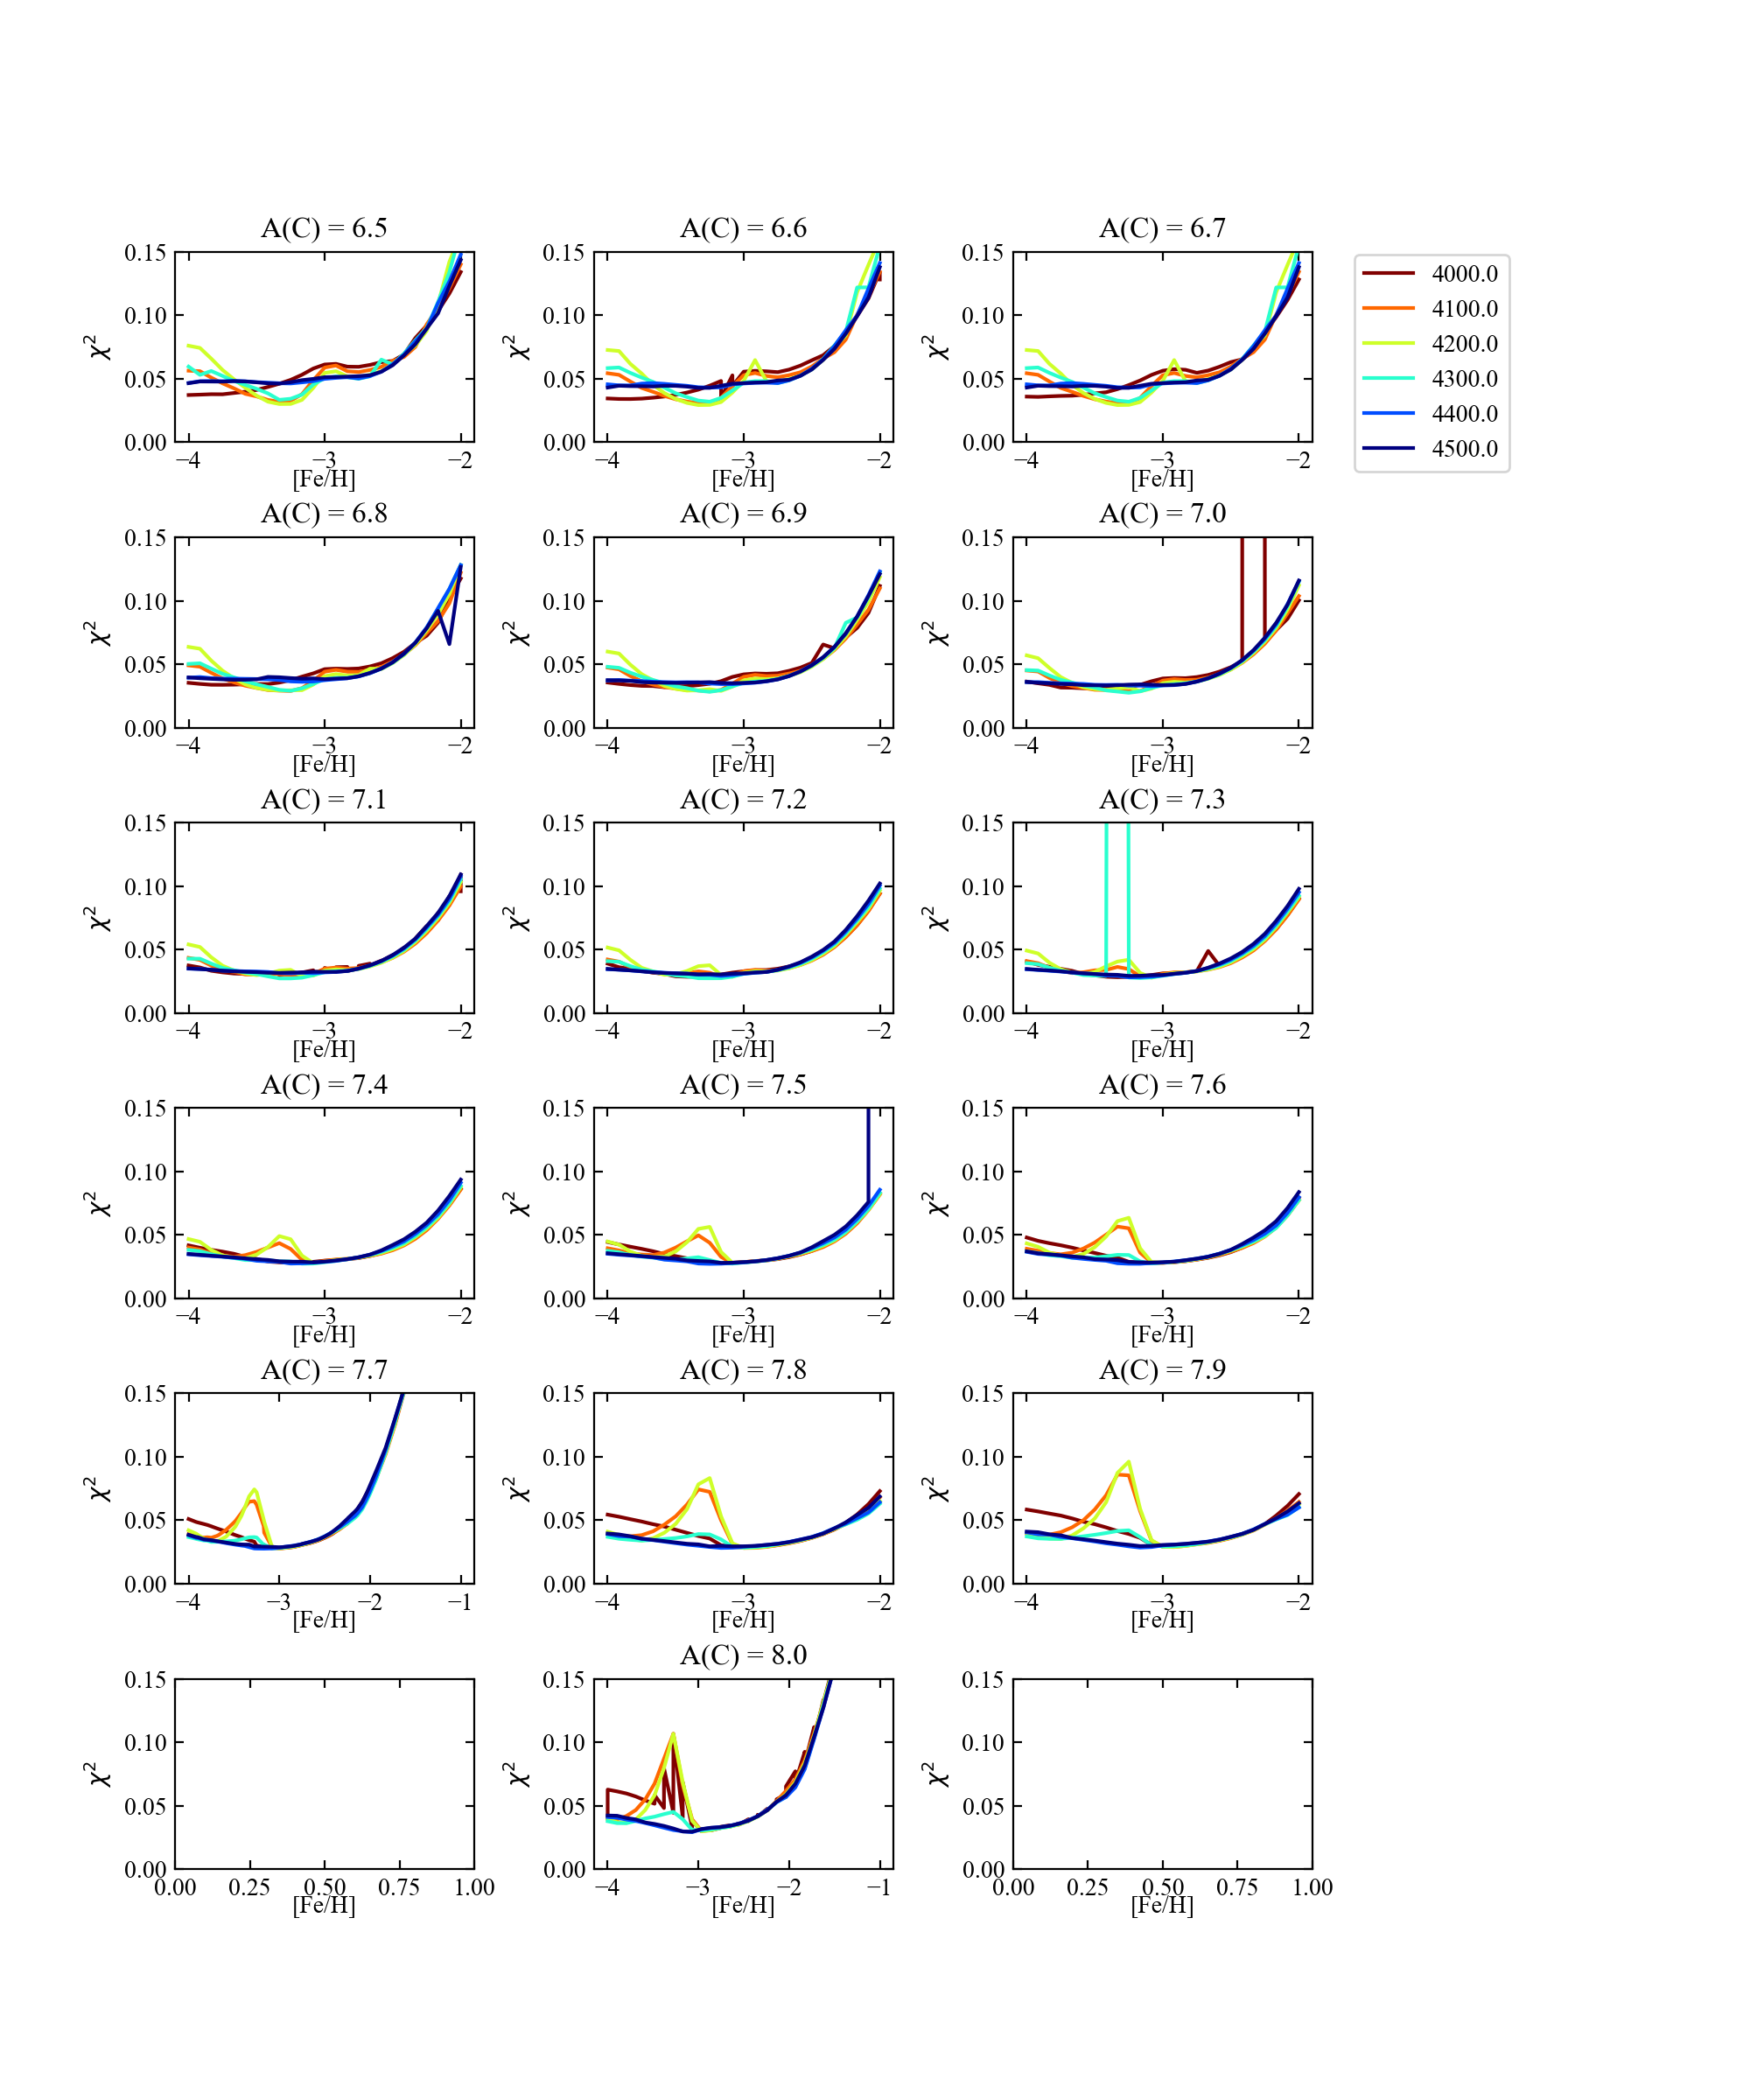

[Text(0,0.5,'$\\chi^2$'),
 Text(0,0.5,'$\\chi^2$'),
 Text(0,0.5,'$\\chi^2$'),
 Text(0,0.5,'$\\chi^2$'),
 Text(0,0.5,'$\\chi^2$'),
 Text(0,0.5,'$\\chi^2$')]

In [73]:
fig, ax = plt.subplots(6,3, figsize=(10,12))



cmap = plt.cm.jet_r(np.linspace(0,1,len(frame_65)))

_ = [ax[0,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_65)]

_ = [ax[0,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_66)]


_ = [ax[0,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_67)]


_ = [ax[1,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_68)]

_ = [ax[1,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_69)]

_ = [ax[1,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_70)]


_ = [ax[2,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_71)]

_ = [ax[2,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_72)]

_ = [ax[2,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_73)]


_ = [ax[3,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_74)]

_ = [ax[3,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_75)]

_ = [ax[3,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_76)]


_ = [ax[4,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_77)]

_ = [ax[4,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_78)]

_ = [ax[4,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_79)]

_ = [ax[5,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_80)]









fig.subplots_adjust(left=0.1, right=0.75, hspace=0.5, wspace=0.4)

#ax[2]

#ax[3]

#ax[4]

ax[0,0].set_title("A(C) = 6.5")
ax[0,1].set_title("A(C) = 6.6")
ax[0,2].set_title("A(C) = 6.7")

ax[1,0].set_title("A(C) = 6.8")
ax[1,1].set_title("A(C) = 6.9")
ax[1,2].set_title("A(C) = 7.0")

ax[2,0].set_title("A(C) = 7.1")
ax[2,1].set_title("A(C) = 7.2")
ax[2,2].set_title("A(C) = 7.3")

ax[3,0].set_title("A(C) = 7.4")
ax[3,1].set_title("A(C) = 7.5")
ax[3,2].set_title("A(C) = 7.6")

ax[4,0].set_title("A(C) = 7.7")
ax[4,1].set_title("A(C) = 7.8")
ax[4,2].set_title("A(C) = 7.9")

ax[5,1].set_title("A(C) = 8.0")
#ax[1,1].set_title("A(C) = 6.9")
#ax[1,2].set_title("A(C) = 7.0")

ax[0,2].legend(bbox_to_anchor=(1.1, 1.05))

[label.set_ylim([0.00,0.15]) for label in ax[:,0]]
[label.set_ylim([0.00,0.15]) for label in ax[:,1]]
[label.set_ylim([0.00,0.15]) for label in ax[:,2]]

[label.tick_params(direction="in", top=True, right=True) for label in ax[:,0]]
[label.tick_params(direction="in", top=True, right=True) for label in ax[:,1]]
[label.tick_params(direction="in", top=True, right=True) for label in ax[:,2]]


[label.set_xlabel("[Fe/H]", labelpad=-2) for label in ax[:,0]]
[label.set_xlabel("[Fe/H]", labelpad=-2) for label in ax[:,1]]
[label.set_xlabel("[Fe/H]", labelpad=-2) for label in ax[:,2]]

[label.set_ylabel("$\chi^2$") for label in ax[:,0]]
[label.set_ylabel("$\chi^2$") for label in ax[:,1]]
[label.set_ylabel("$\chi^2$") for label in ax[:,2]]

#plt.savefig("FEH_chi3.pdf", format="pdf")

<IPython.core.display.Javascript object>


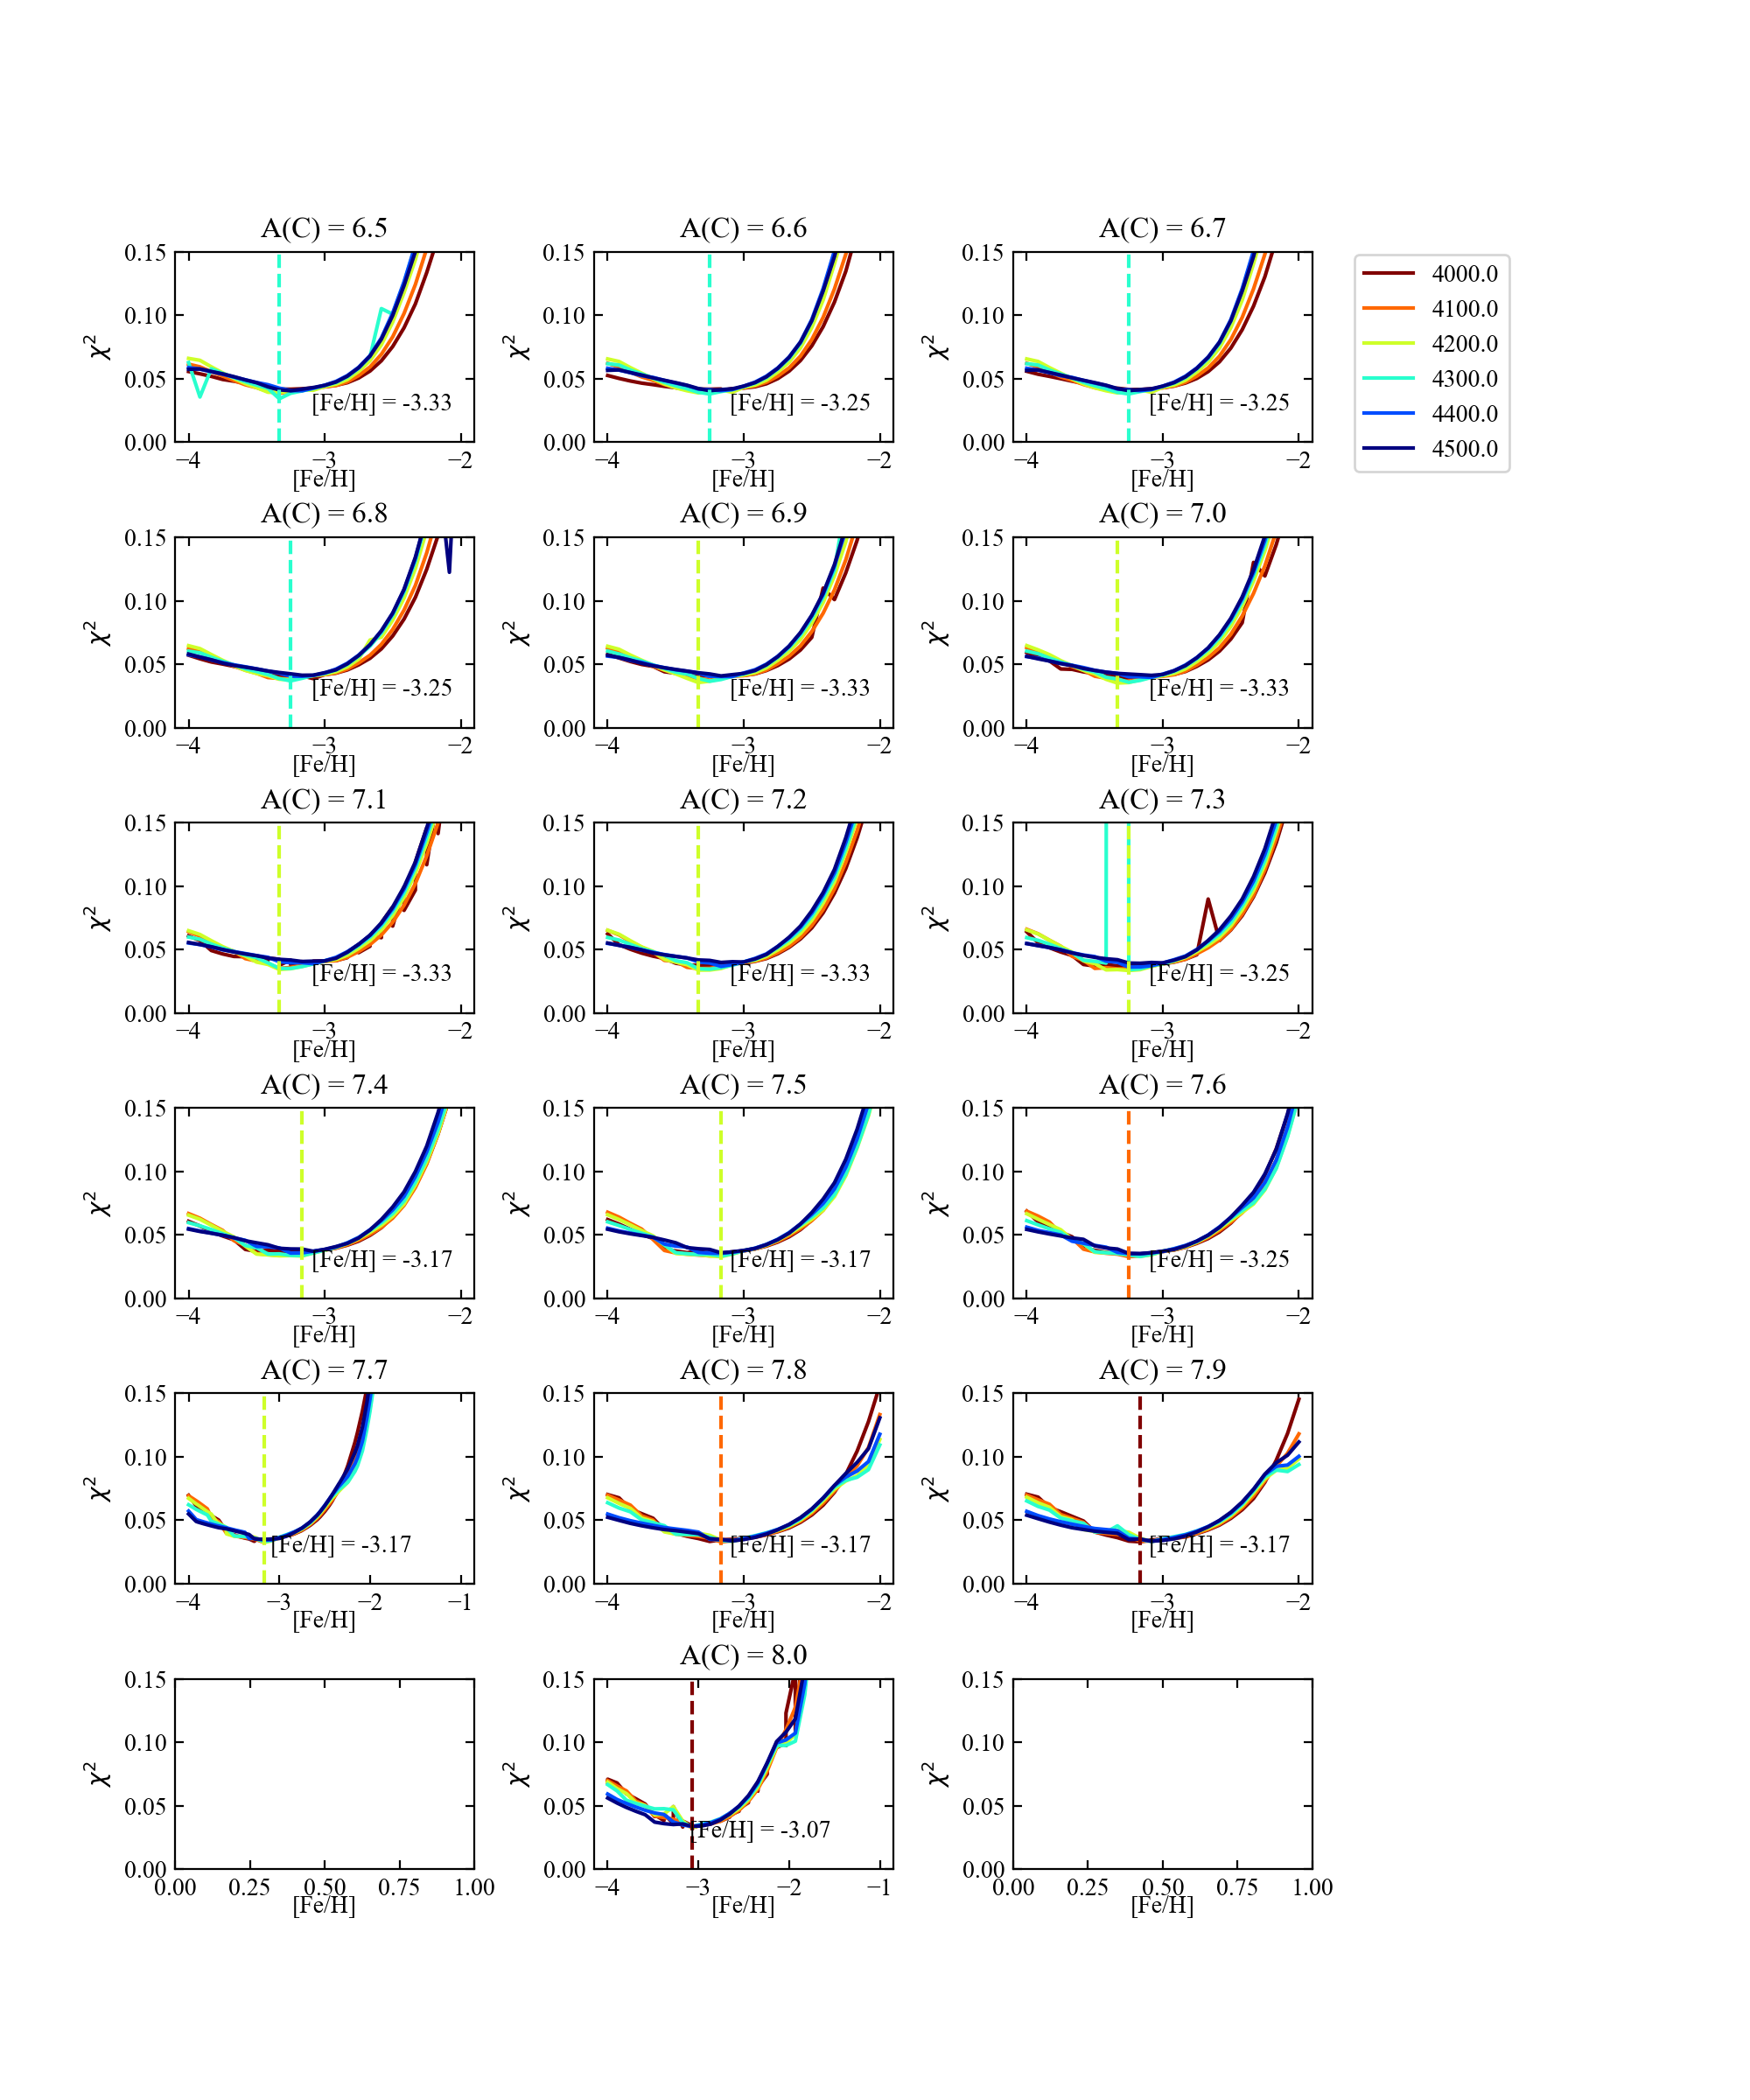

In [80]:
fig, ax = plt.subplots(6,3, figsize=(10,12))



cmap = plt.cm.jet_r(np.linspace(0,1,len(frame_65)))

_ = [ax[0,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_65)]

_ = [ax[0,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_66)]


_ = [ax[0,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_67)]


_ = [ax[1,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_68)]

_ = [ax[1,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_69)]

_ = [ax[1,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_70)]


_ = [ax[2,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_71)]

_ = [ax[2,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_72)]

_ = [ax[2,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_73)]


_ = [ax[3,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_74)]

_ = [ax[3,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_75)]

_ = [ax[3,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_76)]


_ = [ax[4,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_77)]

_ = [ax[4,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_78)]

_ = [ax[4,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_79)]

_ = [ax[5,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(frame_80)]








xt, yt = -3.1, 0.025
low_index = [np.argsort([min(frame['chi2']) for i,frame in enumerate(frame_current)])[0] for frame_current in frame_handles]
#print()
feh_value = float(frame_65[low_index[0]][frame_65[low_index[0]]['chi2'] == min(frame_65[low_index[0]]['chi2'])]['feh'])
ax[0,0].axvline(feh_value,
                color=cmap[low_index[0]], linestyle="--")
ax[0,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_66[low_index[1]][frame_66[low_index[1]]['chi2'] == min(frame_66[low_index[1]]['chi2'])]['feh'])
ax[0,1].axvline(feh_value,
                color=cmap[low_index[1]], linestyle="--")
ax[0,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_67[low_index[2]][frame_67[low_index[2]]['chi2'] == min(frame_67[low_index[2]]['chi2'])]['feh'])

ax[0,2].axvline(feh_value,
                color=cmap[low_index[2]], linestyle="--")
ax[0,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_68[low_index[3]][frame_68[low_index[3]]['chi2'] == min(frame_68[low_index[3]]['chi2'])]['feh'])
ax[1,0].axvline(feh_value,
                color=cmap[low_index[3]], linestyle="--")
ax[1,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_69[low_index[4]][frame_69[low_index[4]]['chi2'] == min(frame_69[low_index[4]]['chi2'])]['feh']),
ax[1,1].axvline(feh_value,
                color=cmap[low_index[4]], linestyle="--")
ax[1,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_70[low_index[5]][frame_70[low_index[5]]['chi2'] == min(frame_70[low_index[5]]['chi2'])]['feh'])
ax[1,2].axvline(feh_value,
                color=cmap[low_index[5]], linestyle="--")
ax[1,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)


feh_value = float(frame_71[low_index[6]][frame_71[low_index[6]]['chi2'] == min(frame_71[low_index[6]]['chi2'])]['feh'])
ax[2,0].axvline(feh_value,
                color=cmap[low_index[6]], linestyle="--")
ax[2,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)


feh_value = float(frame_72[low_index[7]][frame_72[low_index[7]]['chi2'] == min(frame_72[low_index[7]]['chi2'])]['feh'])
ax[2,1].axvline(feh_value,
                color=cmap[low_index[7]], linestyle="--")
ax[2,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_73[low_index[8]][frame_73[low_index[8]]['chi2'] == min(frame_73[low_index[8]]['chi2'])]['feh'])
ax[2,2].axvline(feh_value,
                color=cmap[low_index[8]], linestyle="--")
ax[2,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)



feh_value = float(frame_74[low_index[9]][frame_74[low_index[9]]['chi2'] == min(frame_74[low_index[9]]['chi2'])]['feh'])
ax[3,0].axvline(feh_value,
                color=cmap[low_index[9]], linestyle="--")
ax[3,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)


feh_value = float(frame_75[low_index[10]][frame_75[low_index[10]]['chi2'] == min(frame_75[low_index[10]]['chi2'])]['feh'])
ax[3,1].axvline(feh_value,
                color=cmap[low_index[10]], linestyle="--")
ax[3,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_76[low_index[11]][frame_76[low_index[11]]['chi2'] == min(frame_76[low_index[11]]['chi2'])]['feh'])
ax[3,2].axvline(feh_value,
                color=cmap[low_index[11]], linestyle="--")
ax[3,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)


feh_value = float(frame_77[low_index[12]][frame_77[low_index[12]]['chi2'] == min(frame_77[low_index[12]]['chi2'])]['feh'])
ax[4,0].axvline(feh_value,
                color=cmap[low_index[12]], linestyle="--")
ax[4,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_78[low_index[13]][frame_78[low_index[13]]['chi2'] == min(frame_78[low_index[13]]['chi2'])]['feh'])
ax[4,1].axvline(feh_value,
                color=cmap[low_index[13]], linestyle="--")
ax[4,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_79[low_index[14]][frame_79[low_index[14]]['chi2'] == min(frame_79[low_index[14]]['chi2'])]['feh'])
ax[4,2].axvline(feh_value,
                color=cmap[low_index[14]], linestyle="--")
ax[4,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(frame_80[low_index[15]][frame_80[low_index[15]]['chi2'] == min(frame_80[low_index[15]]['chi2'])]['feh'])
ax[5,1].axvline(feh_value,
                color=cmap[low_index[15]], linestyle="--")
ax[5,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)







fig.subplots_adjust(left=0.1, right=0.75, hspace=0.5, wspace=0.4)

#ax[2]

#ax[3]

#ax[4]

ax[0,0].set_title("A(C) = 6.5")
ax[0,1].set_title("A(C) = 6.6")
ax[0,2].set_title("A(C) = 6.7")

ax[1,0].set_title("A(C) = 6.8")
ax[1,1].set_title("A(C) = 6.9")
ax[1,2].set_title("A(C) = 7.0")

ax[2,0].set_title("A(C) = 7.1")
ax[2,1].set_title("A(C) = 7.2")
ax[2,2].set_title("A(C) = 7.3")

ax[3,0].set_title("A(C) = 7.4")
ax[3,1].set_title("A(C) = 7.5")
ax[3,2].set_title("A(C) = 7.6")

ax[4,0].set_title("A(C) = 7.7")
ax[4,1].set_title("A(C) = 7.8")
ax[4,2].set_title("A(C) = 7.9")

ax[5,1].set_title("A(C) = 8.0")
#ax[1,1].set_title("A(C) = 6.9")
#ax[1,2].set_title("A(C) = 7.0")

ax[0,2].legend(bbox_to_anchor=(1.1, 1.05))

[label.set_ylim([0.00,0.15]) for label in ax[:,0]]
[label.set_ylim([0.00,0.15]) for label in ax[:,1]]
[label.set_ylim([0.00,0.15]) for label in ax[:,2]]

[label.tick_params(direction="in", top=True, right=True) for label in ax[:,0]]
[label.tick_params(direction="in", top=True, right=True) for label in ax[:,1]]
[label.tick_params(direction="in", top=True, right=True) for label in ax[:,2]]


[label.set_xlabel("[Fe/H]", labelpad=-2) for label in ax[:,0]]
[label.set_xlabel("[Fe/H]", labelpad=-2) for label in ax[:,1]]
[label.set_xlabel("[Fe/H]", labelpad=-2) for label in ax[:,2]]

[label.set_ylabel("$\chi^2$") for label in ax[:,0]]
[label.set_ylabel("$\chi^2$") for label in ax[:,1]]
[label.set_ylabel("$\chi^2$") for label in ax[:,2]]

plt.savefig("plots/final/CVn_FEH_chi3.pdf", format="pdf")

In [78]:
len(frame_handles)

16

In [55]:
### G77 chi square fits

<IPython.core.display.Javascript object>


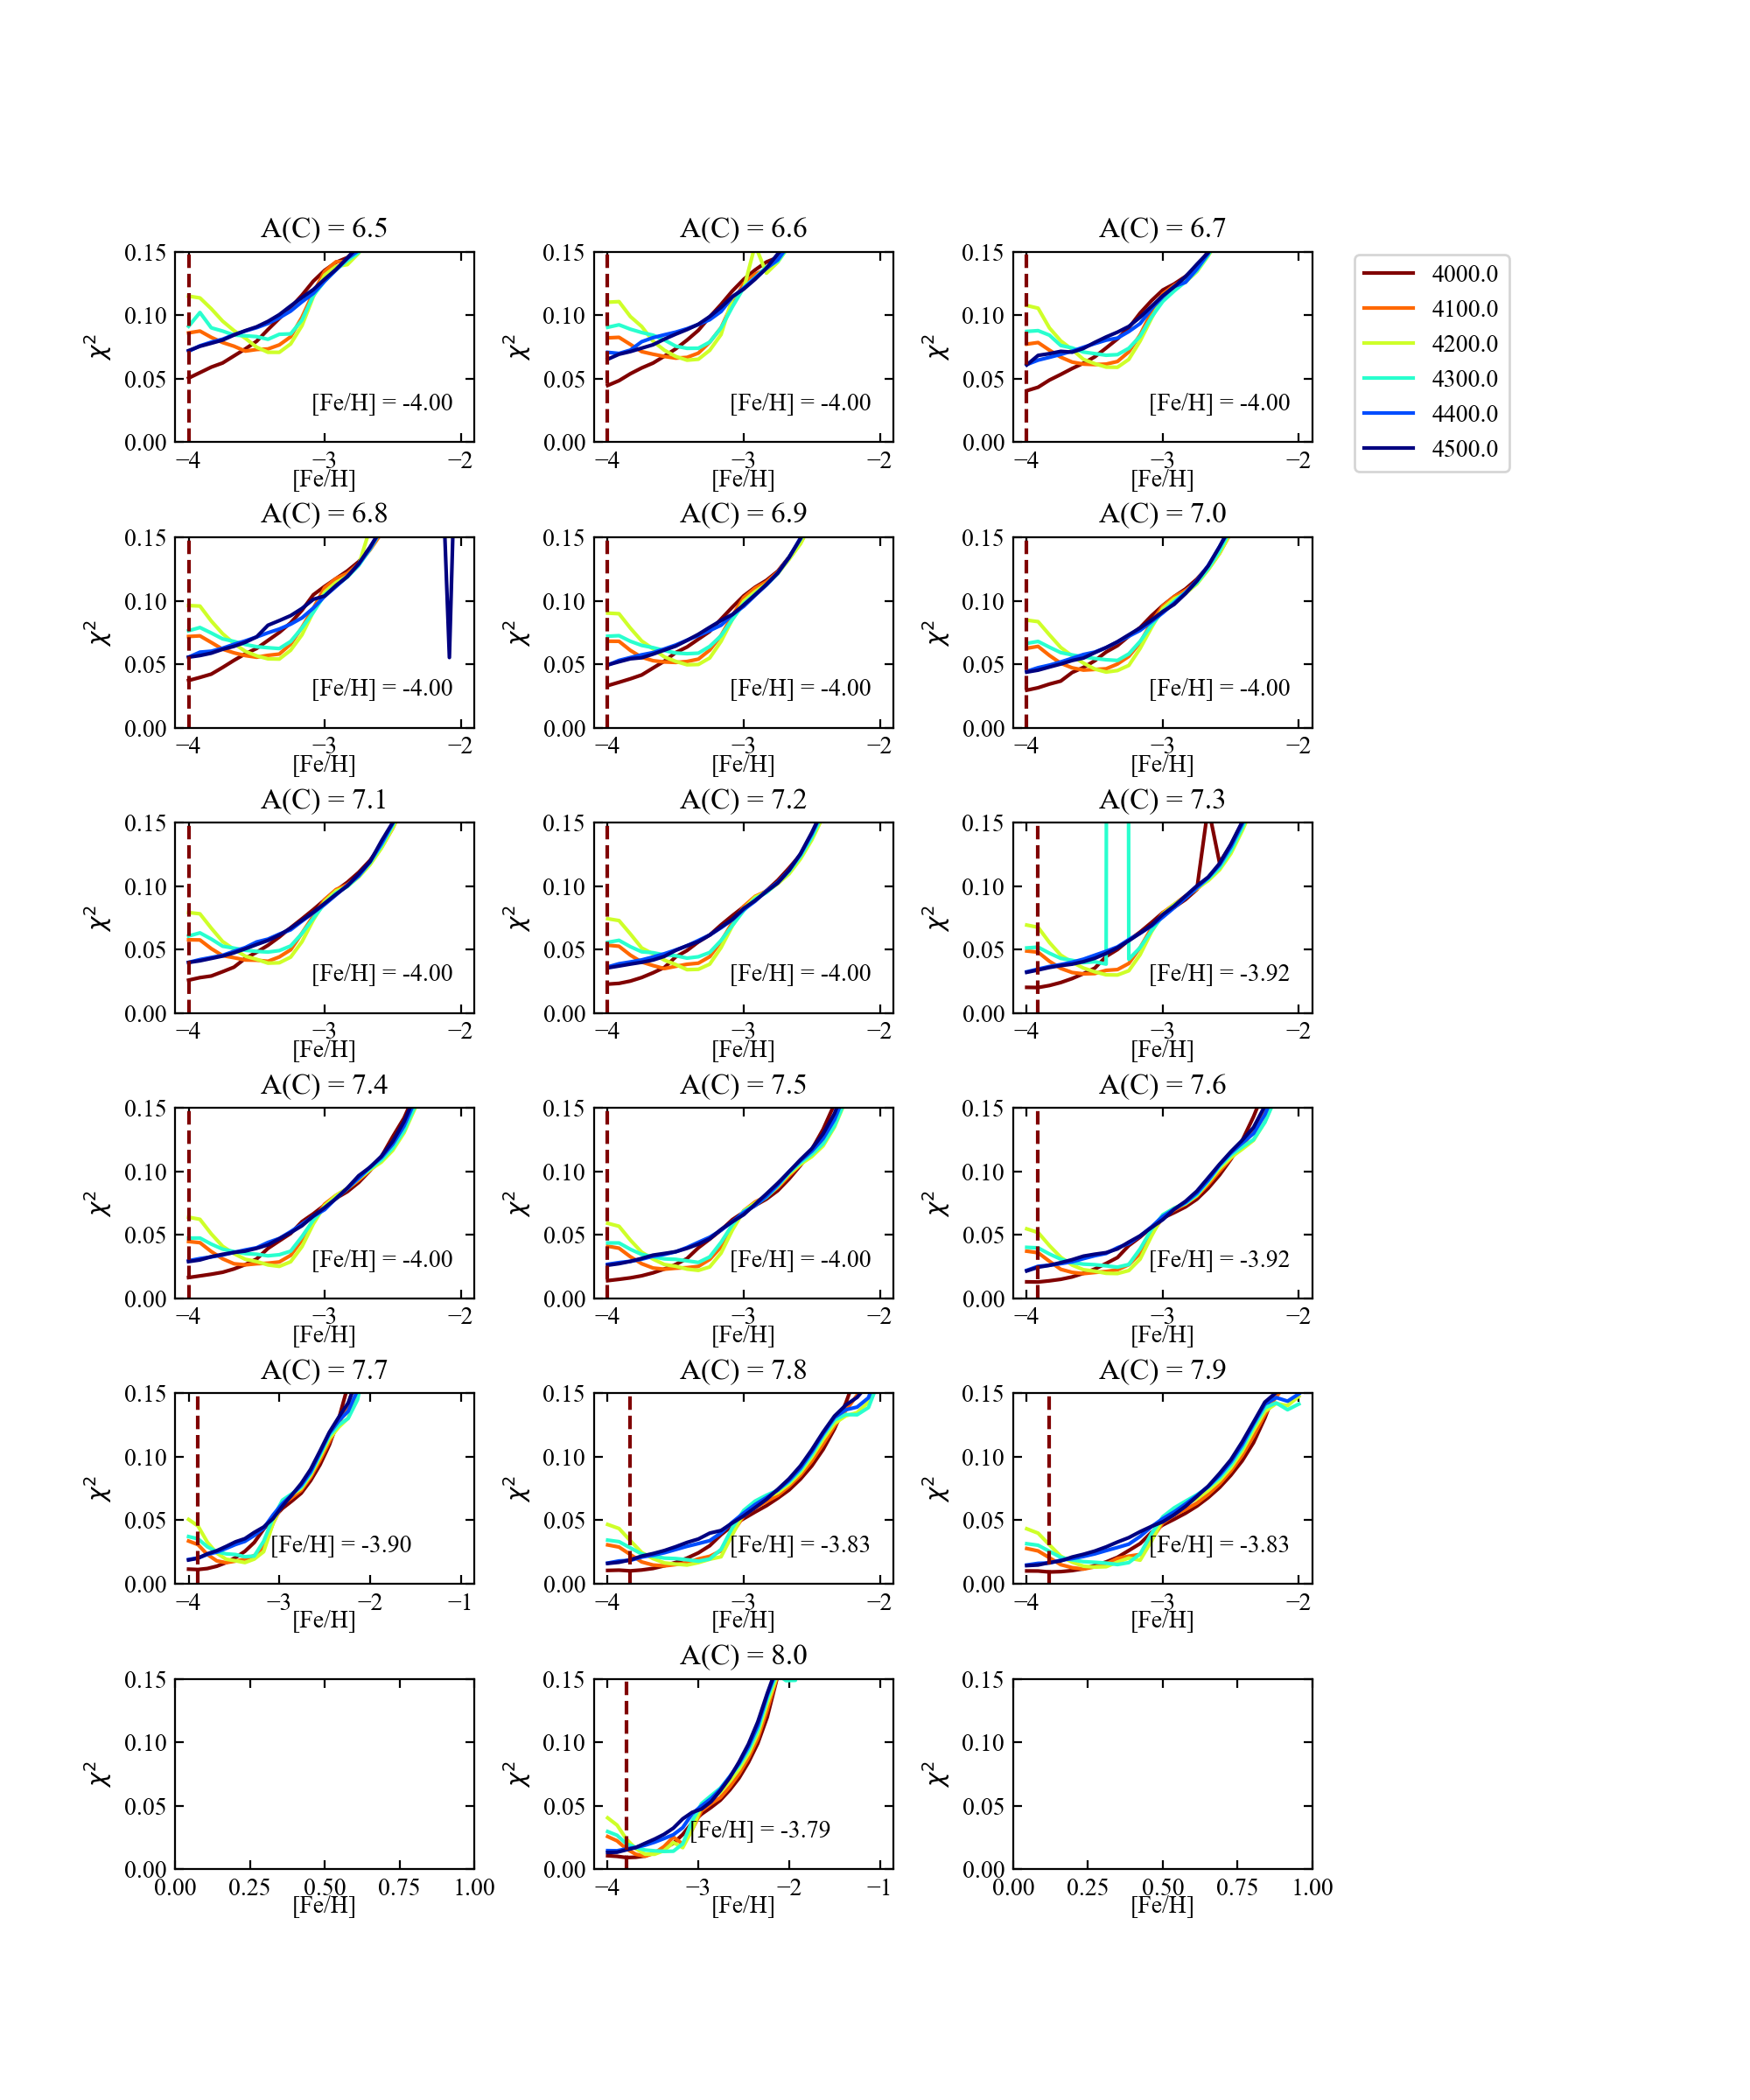

In [85]:
fig, ax = plt.subplots(6,3, figsize=(10,12))



cmap = plt.cm.jet_r(np.linspace(0,1,len(gframe_65)))

_ = [ax[0,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_65)]

_ = [ax[0,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_66)]


_ = [ax[0,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_67)]


_ = [ax[1,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_68)]

_ = [ax[1,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_69)]

_ = [ax[1,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_70)]


_ = [ax[2,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_71)]

_ = [ax[2,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_72)]

_ = [ax[2,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_73)]


_ = [ax[3,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_74)]

_ = [ax[3,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_75)]

_ = [ax[3,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_76)]


_ = [ax[4,0].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_77)]

_ = [ax[4,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_78)]

_ = [ax[4,2].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_79)]

_ = [ax[5,1].plot(frame['feh'], frame['chi2'], color=cmap[i], label=frame['temp'].iloc[0]) for i,frame in enumerate(gframe_80)]








xt, yt = -3.1, 0.025
low_index = [np.argsort([min(frame['chi2']) for i,frame in enumerate(frame_current)])[0] for frame_current in gframe_handles]
#print()
feh_value = float(gframe_65[low_index[0]][gframe_65[low_index[0]]['chi2'] == min(gframe_65[low_index[0]]['chi2'])]['feh'])
ax[0,0].axvline(feh_value,
                color=cmap[low_index[0]], linestyle="--")
ax[0,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_66[low_index[1]][gframe_66[low_index[1]]['chi2'] == min(gframe_66[low_index[1]]['chi2'])]['feh'])
ax[0,1].axvline(feh_value,
                color=cmap[low_index[1]], linestyle="--")
ax[0,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_67[low_index[2]][gframe_67[low_index[2]]['chi2'] == min(gframe_67[low_index[2]]['chi2'])]['feh'])

ax[0,2].axvline(feh_value,
                color=cmap[low_index[2]], linestyle="--")
ax[0,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_68[low_index[3]][gframe_68[low_index[3]]['chi2'] == min(gframe_68[low_index[3]]['chi2'])]['feh'])
ax[1,0].axvline(feh_value,
                color=cmap[low_index[3]], linestyle="--")
ax[1,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_69[low_index[4]][gframe_69[low_index[4]]['chi2'] == min(gframe_69[low_index[4]]['chi2'])]['feh']),
ax[1,1].axvline(feh_value,
                color=cmap[low_index[4]], linestyle="--")
ax[1,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_70[low_index[5]][gframe_70[low_index[5]]['chi2'] == min(gframe_70[low_index[5]]['chi2'])]['feh'])
ax[1,2].axvline(feh_value,
                color=cmap[low_index[5]], linestyle="--")
ax[1,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)


feh_value = float(gframe_71[low_index[6]][gframe_71[low_index[6]]['chi2'] == min(gframe_71[low_index[6]]['chi2'])]['feh'])
ax[2,0].axvline(feh_value,
                color=cmap[low_index[6]], linestyle="--")
ax[2,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)


feh_value = float(gframe_72[low_index[7]][gframe_72[low_index[7]]['chi2'] == min(gframe_72[low_index[7]]['chi2'])]['feh'])
ax[2,1].axvline(feh_value,
                color=cmap[low_index[7]], linestyle="--")
ax[2,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_73[low_index[8]][gframe_73[low_index[8]]['chi2'] == min(gframe_73[low_index[8]]['chi2'])]['feh'])
ax[2,2].axvline(feh_value,
                color=cmap[low_index[8]], linestyle="--")
ax[2,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)



feh_value = float(gframe_74[low_index[9]][gframe_74[low_index[9]]['chi2'] == min(gframe_74[low_index[9]]['chi2'])]['feh'])
ax[3,0].axvline(feh_value,
                color=cmap[low_index[9]], linestyle="--")
ax[3,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)


feh_value = float(gframe_75[low_index[10]][gframe_75[low_index[10]]['chi2'] == min(gframe_75[low_index[10]]['chi2'])]['feh'])
ax[3,1].axvline(feh_value,
                color=cmap[low_index[10]], linestyle="--")
ax[3,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_76[low_index[11]][gframe_76[low_index[11]]['chi2'] == min(gframe_76[low_index[11]]['chi2'])]['feh'])
ax[3,2].axvline(feh_value,
                color=cmap[low_index[11]], linestyle="--")
ax[3,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)


feh_value = float(gframe_77[low_index[12]][gframe_77[low_index[12]]['chi2'] == min(gframe_77[low_index[12]]['chi2'])]['feh'])
ax[4,0].axvline(feh_value,
                color=cmap[low_index[12]], linestyle="--")
ax[4,0].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_78[low_index[13]][gframe_78[low_index[13]]['chi2'] == min(gframe_78[low_index[13]]['chi2'])]['feh'])
ax[4,1].axvline(feh_value,
                color=cmap[low_index[13]], linestyle="--")
ax[4,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_79[low_index[14]][gframe_79[low_index[14]]['chi2'] == min(gframe_79[low_index[14]]['chi2'])]['feh'])
ax[4,2].axvline(feh_value,
                color=cmap[low_index[14]], linestyle="--")
ax[4,2].text(xt,yt, "[Fe/H] = %.2F" % feh_value)

feh_value = float(gframe_80[low_index[15]][gframe_80[low_index[15]]['chi2'] == min(gframe_80[low_index[15]]['chi2'])]['feh'])
ax[5,1].axvline(feh_value,
                color=cmap[low_index[15]], linestyle="--")
ax[5,1].text(xt,yt, "[Fe/H] = %.2F" % feh_value)







fig.subplots_adjust(left=0.1, right=0.75, hspace=0.5, wspace=0.4)

#ax[2]

#ax[3]

#ax[4]

ax[0,0].set_title("A(C) = 6.5")
ax[0,1].set_title("A(C) = 6.6")
ax[0,2].set_title("A(C) = 6.7")

ax[1,0].set_title("A(C) = 6.8")
ax[1,1].set_title("A(C) = 6.9")
ax[1,2].set_title("A(C) = 7.0")

ax[2,0].set_title("A(C) = 7.1")
ax[2,1].set_title("A(C) = 7.2")
ax[2,2].set_title("A(C) = 7.3")

ax[3,0].set_title("A(C) = 7.4")
ax[3,1].set_title("A(C) = 7.5")
ax[3,2].set_title("A(C) = 7.6")

ax[4,0].set_title("A(C) = 7.7")
ax[4,1].set_title("A(C) = 7.8")
ax[4,2].set_title("A(C) = 7.9")

ax[5,1].set_title("A(C) = 8.0")
#ax[1,1].set_title("A(C) = 6.9")
#ax[1,2].set_title("A(C) = 7.0")

ax[0,2].legend(bbox_to_anchor=(1.1, 1.05))

[label.set_ylim([0.00,0.15]) for label in ax[:,0]]
[label.set_ylim([0.00,0.15]) for label in ax[:,1]]
[label.set_ylim([0.00,0.15]) for label in ax[:,2]]

[label.tick_params(direction="in", top=True, right=True) for label in ax[:,0]]
[label.tick_params(direction="in", top=True, right=True) for label in ax[:,1]]
[label.tick_params(direction="in", top=True, right=True) for label in ax[:,2]]


[label.set_xlabel("[Fe/H]", labelpad=-2) for label in ax[:,0]]
[label.set_xlabel("[Fe/H]", labelpad=-2) for label in ax[:,1]]
[label.set_xlabel("[Fe/H]", labelpad=-2) for label in ax[:,2]]

[label.set_ylabel("$\chi^2$") for label in ax[:,0]]
[label.set_ylabel("$\chi^2$") for label in ax[:,1]]
[label.set_ylabel("$\chi^2$") for label in ax[:,2]]

plt.savefig("plots/final/G77_FEH_chi3.pdf", format="pdf")

1. [Fe/h]=-3.5 and   AC=8.0 
2. [Fe/H] =-2.5 and  AC =8.0 
2. [Fe/h]= -2.0  and  AC=8.0
3.  [Fe/h] =-1.5  and AC =8.0

In [83]:
### Read my normalized versions first
path = '/Users/MasterD/Google Drive/Yoon_UMP/output/giant/interp/T4200_AC8.0/'
spec_norm1 = pd.read_csv(path + "T4200.0000g0.20000000z-3.4827586c3.0527586.csvnorm_full.dat")
spec_norm2 = pd.read_csv(path + 'T4200.0000g0.20000000z-2.5517241c2.1217241.csvnorm_full.dat')
spec_norm3 = pd.read_csv(path + 'T4200.0000g0.20000000z-2.0344828c1.6044828.csvnorm_full.dat')
spec_norm4 = pd.read_csv(path + 'T4200.0000g0.20000000z-1.5172414c1.0872414.csvnorm_full.dat')


path = '/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/interp/T4200_AC8.0/'

spec1 = pd.read_csv(path + 'T4200.0000g0.20000000z-3.4827586c3.0527586.csv')
spec2 = pd.read_csv(path + 'T4200.0000g0.20000000z-2.5517241c2.1217241.csv')
spec3 = pd.read_csv(path + 'T4200.0000g0.20000000z-2.0344828c1.6044828.csv')
spec4 = pd.read_csv(path + 'T4200.0000g0.20000000z-1.5172414c1.0872414.csv')

In [60]:
low_index = [np.argsort([min(frame['chi2']) for i,frame in enumerate(frame_current)])[0] for frame_current in gframe_handles]

<IPython.core.display.Javascript object>


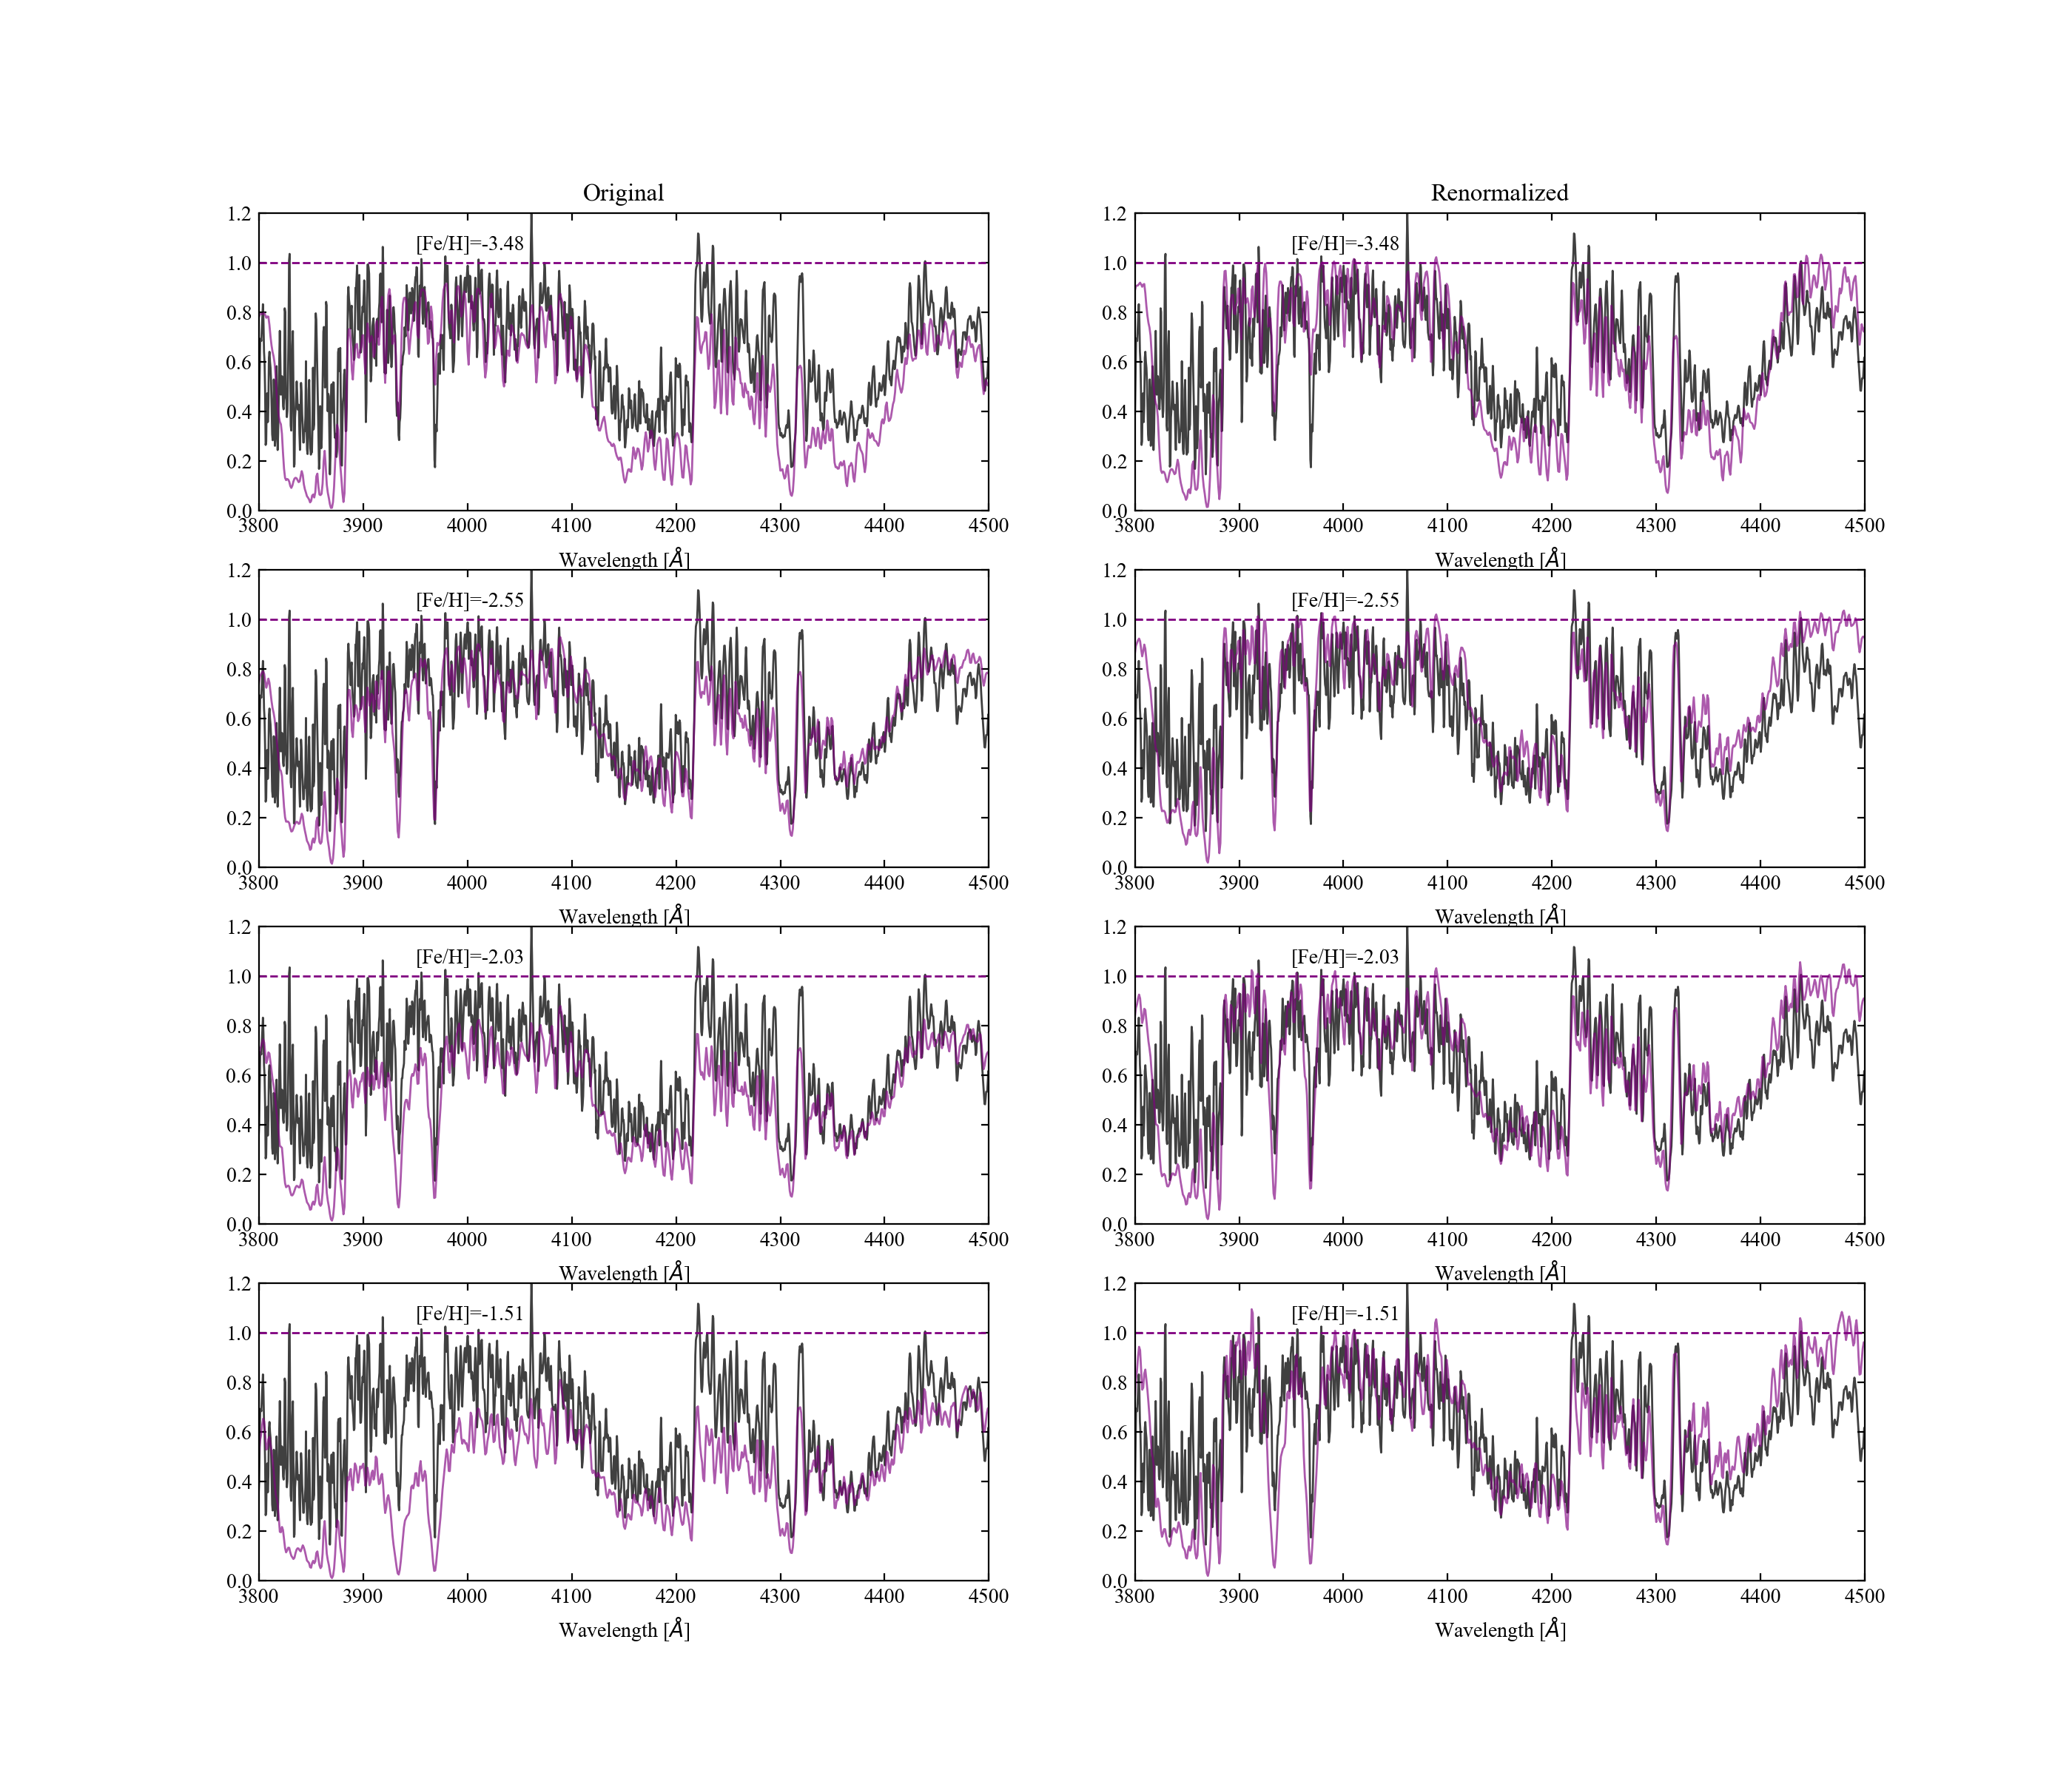

In [122]:
fig, ax = plt.subplots(4,2, figsize=(14, 12))
lw=1
color="purple"

[label.plot(CV['wave'], CV['norm'], linewidth=1., color="black", alpha=0.75) for label in ax[:,0]]
[label.plot(CV['wave'], CV['norm'], linewidth=1., color="black", alpha=0.75) for label in ax[:,1]]


ax[0,0].plot(spec1['wl'], spec1['flux'], linewidth=lw, color=color, alpha=0.65)
ax[0,1].plot(spec_norm1['wave'], spec_norm1['norm'], linewidth=lw, color=color, alpha=0.65)

ax[1,0].plot(spec2['wl'], spec2['flux'], linewidth=lw, color=color, alpha=0.65)
ax[1,1].plot(spec_norm2['wave'], spec_norm2['norm'], linewidth=lw, color=color, alpha=0.65)

ax[2,0].plot(spec3['wl'], spec3['flux'], linewidth=lw, color=color, alpha=0.65)
ax[2,1].plot(spec_norm3['wave'], spec_norm3['norm'], linewidth=lw, color=color, alpha=0.65)


ax[3,0].plot(spec4['wl'], spec4['flux'], linewidth=lw, color=color, alpha=0.65)
ax[3,1].plot(spec_norm4['wave'], spec_norm4['norm'], linewidth=lw, color=color, alpha=0.65)





ax[0,0].set_title("Original")
ax[0,1].set_title("Renormalized")
[label.axhline(1.0, linestyle="--", color="purple", linewidth=1.) for label in np.concatenate([ax[:,0], ax[:,1]])]

[label.set_xlabel(r"Wavelength [$\AA$]") for label in np.concatenate([ax[:,0], ax[:,1]])]

[label.text(3950, 1.05, '[Fe/H]=-3.48') for label in ax[0,:]]
[label.text(3950, 1.05, '[Fe/H]=-2.55') for label in ax[1,:]]
[label.text(3950, 1.05, '[Fe/H]=-2.03') for label in ax[2,:]]
[label.text(3950, 1.05, '[Fe/H]=-1.51') for label in ax[3,:]]

[label.set_xlim(3800, 4500) for label in np.concatenate([ax[:,0], ax[:,1]])]
[label.set_ylim(0, 1.2) for label in np.concatenate([ax[:,0], ax[:,1]])]
[label.tick_params(direction="in", top=True, right=True) for label in np.concatenate([ax[:,0], ax[:,1]])]

plt.savefig("feh_veiling_norm_example.pdf", format="pdf")

<IPython.core.display.Javascript object>


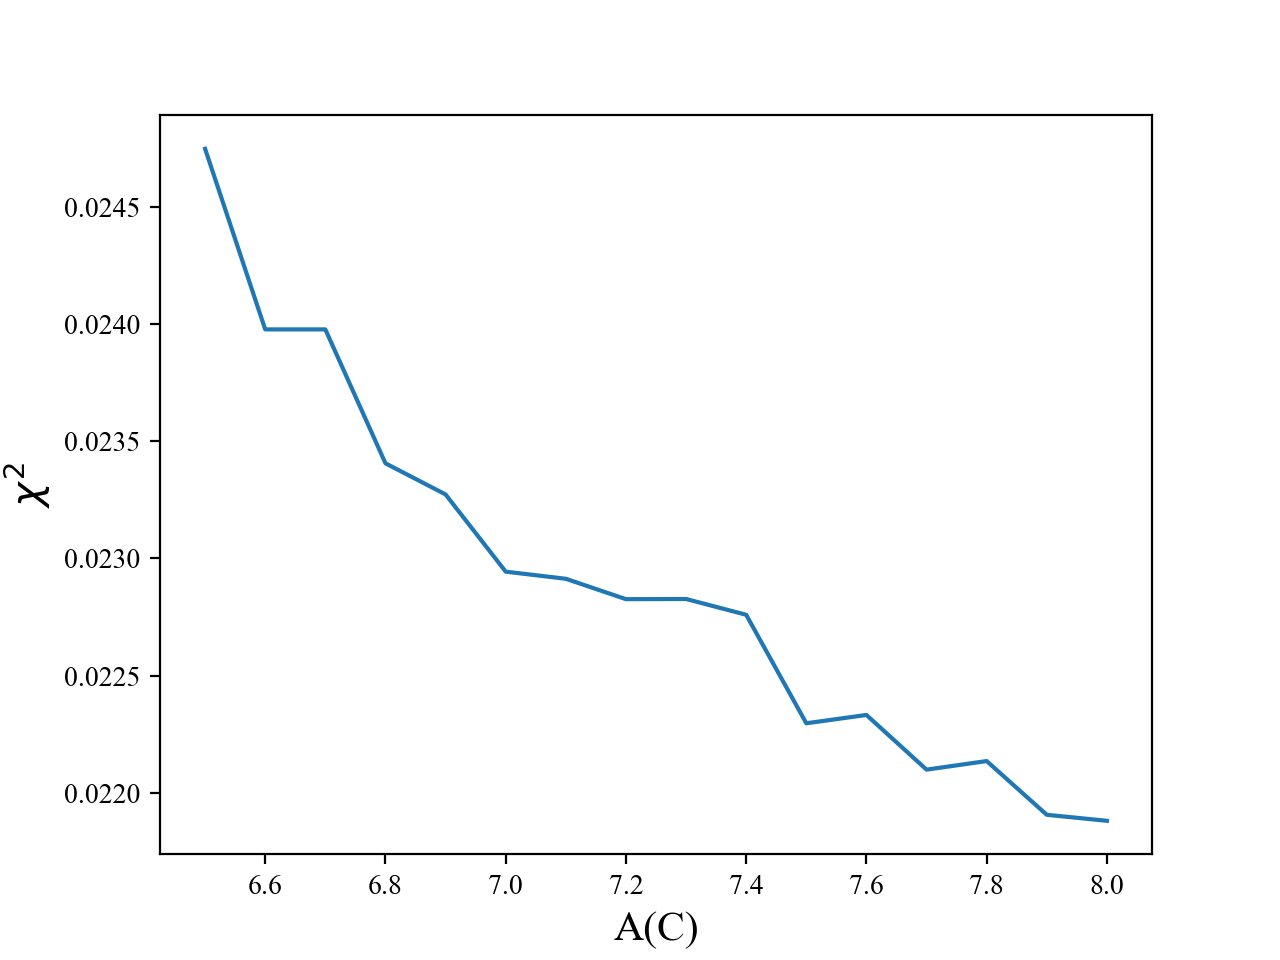

Text(0,0.5,'$\\chi^2$')

In [69]:
fig, ax = plt.subplots(1,1)

ax.plot([6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0], [min([min(frame['chi2']) for i,frame in enumerate(frame_current)]) for frame_current in frame_handles])

ax.set_xlabel("A(C)", fontsize=15)
ax.set_ylabel("$\chi^2$", fontsize=15)

In [196]:
## frame of lowest chi2
np.argsort([min(frame['chi2']) for i,frame in enumerate(frame_65)])[0]

2

In [219]:
low_index

[2, 2, 2, 2, 2, 2]

In [198]:
frame_65[low_index][frame_65[low_index]['chi2'] == min(frame_65[low_index]['chi2'])]['feh']

7   -3.368421
Name: feh, dtype: float64